# Introduction to deep learning using Keras

In this class we will explore some of the deep learning capabilities of the library Keras. After this class, you will be able to:

  * Build and train a simple model using this library.
  * Use data augmentation to generate "fake" samples and improve accuracy of a deep learning model with limited training data.
  * Standing on the shoulders of giants: use a pretrained network to improve accuracy for:
    - image classification
    - natural language processing.


## First steps with keras

First, we will install Keras. If you don't have keras installed, executing the following line will install it


In [1]:
!conda install --yes --channel https://conda.anaconda.org/conda-forge keras tensorflow

Solving environment: / ^C
failed

CondaError: KeyboardInterrupt



In [1]:
import keras

Using TensorFlow backend.
/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gregoire/a

## First steps with Keras

Keras is a high-level library for deep learning with an API modeled after scikit-learn. It makes use of Theano of Tensorflow beneath the scenes for the actual computations.

In [2]:
#%pylab inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

The API has two modes, Sequential and Functional. We will focus on the Sequential API. 

This API is based on the ```Sequential``` object, to which we add the different layers of the network. We will start with a simple shallow networks, a single-layer perceptron:

In [3]:
# generate dummy data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = (iris.target >= 1).astype(int)  # take only two classes for simplicity
n_features = iris.data.shape[1]

# initializes the model
model = Sequential()
# add a layer with one neuron and a sigmoid activation, i.e a perceptron
model.add(Dense(1, input_dim=n_features, activation='sigmoid'))

# model.summary prints a description of your model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [4]:
X.shape

(150, 4)

In [5]:
import numpy as np
print(np.unique(y, return_counts=True), 100 / 150)

(array([0, 1]), array([ 50, 100])) 0.6666666666666666


We will now train the model on the dummy generated data.

<img style="float: left; width: 50px; top: -20px" src="https://cdn1.iconfinder.com/data/icons/hawcons/32/700303-icon-61-warning-128.png" /> In Keras, before a model is fitted it needs to be "compiled".



If you want to perform some validation use the argument `validation_split`. You'll have to shuffle the dataset first.

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# train the model, iterating on the data in batches
# of 32 samples
model.fit(X, y, nb_epoch=20)

Instructions for updating:
Use tf.cast instead.


/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.4553 - accuracy: 0.6667
Epoch 2/20
150/150 [==============================] - 0s 31us/step - loss: 1.4259 - accuracy: 0.6667
Epoch 3/20
150/150 [==============================] - 0s 50us/step - loss: 1.4038 - accuracy: 0.6667
Epoch 4/20
150/150 [==============================] - 0s 230us/step - loss: 1.3844 - accuracy: 0.6667
Epoch 5/20
150/150 [==============================] - 0s 104us/step - loss: 1.3658 - accuracy: 0.6667
Epoch 6/20
150/150 [==============================] - 0s 78us/step - loss: 1.3478 - accuracy: 0.6667
Epoch 7/20
150/150 [==============================] - 0s 63us/step - loss: 1.3303 - accuracy: 0.6667
Epoch 8/20
150/150 [==============================] - 0s 63us/step - loss: 1.3118 - accuracy: 0.6667
Epoch 9/20
150/150 [==============================] - 0s 38us/step - loss: 1.2933 - accuracy: 0.6667
Epoch 10/20
150/150 [==============================] - 0s 93us/step - loss: 1.2760 - accur

In [7]:
model.metrics_names

['loss', 'accuracy']

In [8]:
# the score can be computed using model.evaluate
model.evaluate(X, y)

150/150 [==============================] - 0s 239us/step


[1.0899399569131978, 0.6666666865348816]

## Scikit-learn <=> Keras dictionary

```model.fit```  <-> ```model.compile``` followed by ```model.fit```

```model.predict``` <-> ```model.predict```

```model.score``` <-> ```model.evaluate(x)[1]```

---

## Going deeper

The great aspect of Keras is that it makes it easier to build more complex models by adding layers to the network. This is achieved e.g. with the ```.add``` method

In [9]:
model = Sequential()
model.add(Dense(64, input_dim=n_features, init='uniform', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
None


/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=4, activation="tanh", kernel_initializer="uniform")`
  


In [10]:
# train the model, iterating on the data in batches
# of 32 samples
model.fit(X, y, nb_epoch=20)


/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 0.6102 - accuracy: 0.6467
Epoch 2/20
150/150 [==============================] - 0s 140us/step - loss: 0.5524 - accuracy: 0.6933
Epoch 3/20
150/150 [==============================] - 0s 54us/step - loss: 0.4697 - accuracy: 0.7000
Epoch 4/20
150/150 [==============================] - 0s 65us/step - loss: 0.4399 - accuracy: 0.7667
Epoch 5/20
150/150 [==============================] - 0s 86us/step - loss: 0.3831 - accuracy: 0.8133
Epoch 6/20
150/150 [==============================] - 0s 95us/step - loss: 0.3126 - accuracy: 0.8933
Epoch 7/20
150/150 [==============================] - 0s 152us/step - loss: 0.2694 - accuracy: 0.9667
Epoch 8/20
150/150 [==============================] - 0s 190us/step - loss: 0.2147 - accuracy: 0.9733
Epoch 9/20
150/150 [==============================] - 0s 119us/step - loss: 0.1959 - accuracy: 1.0000
Epoch 10/20
150/150 [==============================] - 0s 165us/step - loss: 0.1649 - ac

In [11]:
model.evaluate(X, y)

150/150 [==============================] - 0s 311us/step


[0.008008209574812403, 1.0]

Unsurprisingly, it performs better on the train set since the model is more complex.

# Deep learning on images

Now lets turn to a real example, discriminating between dogs or cats in natural images:

![](https://blog.keras.io/img/imgclf/cats_and_dogs.png)

For this, I have prepared a dataset consisting of 1000 cats and 1000 dogs that you can [download from here](https://www.dropbox.com/s/p0vsabq3og88702/cats_vs_dogs.zip?dl=0). You should extract it to the current directory (i.e. wherever this notebook lives).

In [12]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# this is a generator that will read pictures found in
# subfolers of '$dataset/train'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'dogs_cats_sample_1000/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'dogs_cats_sample_1000/valid',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu', data_format='channels_first'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)
# On top of it we stick two fully-connected layers. We end the model with a single unit and a sigmoid activation, 
# which is perfect for a binary classification. To go with it we will also use the binary_crossentropy
# loss to train our model.

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 148, 1)        43232     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 74, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 72, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 14, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 36, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 34, 64)         18496     
_________________________________________________________________
activation_6 (Activation)    (None, 5, 34, 64)        

In [33]:
import sys
from PIL import Image
print(Image.__file__)
sys.modules['Image'] = Image 
out = train_generator.next()
print(out[0].shape)

/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/PIL/Image.py
(32, 150, 150, 3)


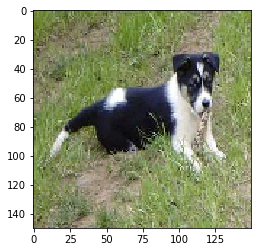

In [34]:
import matplotlib.pyplot as plt
plt.imshow(out[0][0])

In [35]:
model.fit_generator(
        train_generator,
        samples_per_epoch=2000,
        nb_epoch=5,
        validation_data=test_generator,
        nb_val_samples=200
)
model.save_weights('first_try.h5')  # always save your weights after training or during training

/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=62, epochs=5, validation_steps=200)`
  


Epoch 1/5
62/62 [==============================] - 29s 476ms/step - loss: 0.7172 - accuracy: 0.4832 - val_loss: 0.6865 - val_accuracy: 0.4909
Epoch 2/5
62/62 [==============================] - 28s 448ms/step - loss: 0.6959 - accuracy: 0.5178 - val_loss: 0.6718 - val_accuracy: 0.5139
Epoch 3/5
62/62 [==============================] - 26s 419ms/step - loss: 0.6981 - accuracy: 0.5203 - val_loss: 0.6777 - val_accuracy: 0.6082
Epoch 4/5
62/62 [==============================] - 25s 398ms/step - loss: 0.6841 - accuracy: 0.5676 - val_loss: 0.6712 - val_accuracy: 0.5340
Epoch 5/5
62/62 [==============================] - 37s 593ms/step - loss: 0.6694 - accuracy: 0.5864 - val_loss: 0.8972 - val_accuracy: 0.6100



# Problem 1:

  * What is going on? This architecture achives above 90% accuracy on Imagenet -- a much more challenging task.
  * How can we solve this issue?

In [40]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        #'cats_vs_dogs/train',  # this is the target directory
        'dogs_cats_sample_1000/train',
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
test_generator = test_datagen.flow_from_directory(
        #'cats_vs_dogs/test',
        'dogs_cats_sample_1000/valid',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Using pretrained networks

Another way to leaverage similarity with existing datasets is through pretrained networks. Such a network would have already learned features that are useful for most computer vision problems, and leveraging such features would allow us to reach a better accuracy than any method that would only rely on the available data.

# Problem 2

Use a pre-trained networks to generate the appropriate features for this task. For this, we will:

 * [Download the weights](https://drive.google.com/file/d/0Bz7KyqmuGsilT0J5dmRCM0ROVHc/view?usp=sharing) of an existing model, more precisely a 16-layer network used by the VGG team in the ILSVRC-2014 competition.
 
 * The code below will generate the features for the train set and save it to the file ```bottleneck_features_train.npy``` and ```bottleneck_features_test.npy```.

 * Construct a simple classifier (e.g. a scikit-learn linear model) that uses these features to predict cat/dog (this is the part that you need to code :-).


In [41]:
# template code to get you started

import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

# path to the model weights file.
weights_path = 'vgg16_weights.h5'
# dimensions of our images.
img_width, img_height = 150, 150

# train_data_dir = 'cats_vs_dogs/train'
train_data_dir = 'dogs_cats_sample_1000/train'
# validation_data_dir = 'cats_vs_dogs/test'
validation_data_dir = 'dogs_cat_sample_1000/valid'
nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1./255)

    # build the VGG16 network
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height)))

    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # load the weights of the VGG16 networks
    # (trained on ImageNet, won the ILSVRC competition in 2014)
    # note: when there is a complete match between your model definition
    # and your weight savefile, you can simply call model.load_weights(filename)
    assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
    f = h5py.File(weights_path)
    for k in range(f.attrs['nb_layers']):
        if k >= len(model.layers):
            # we don't look at the last (fully-connected) layers in the savefile
            break
        g = f['layer_{}'.format(k)]
        weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
        model.layers[k].set_weights(weights)
    f.close()
    print('Model loaded.')

    generator = datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
    bottleneck_features_train = model.predict_generator(generator, nb_train_samples)


    generator = datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
    bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples)

    return bottleneck_features_train, bottleneck_features_validation

    # TODO: save the features and do the same on the test set


In [42]:
feat_train, feat_test = save_bottlebeck_features()

/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_1")`
/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_2")`
/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_1")`
/Users/gregoire/anaconda/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_2")`


ValueError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_8/MaxPool' (op: 'MaxPool') with input shapes: [?,1,75,128].

(2000, 512, 4, 4)

## Problem 3: pretrained models for natural language

It is also possible to use pretrained networks for the task of classification of text data. In this case we will make use of word embedding and the GloVe networks which you can [download from here](http://nlp.stanford.edu/data/glove.6B.zip).


As motivation task, we will use an old friend, the 20news dataset :-)


In [66]:
# load the 20news dataset

from sklearn import datasets

categories = [
        'comp.graphics',
        'sci.space',
    ]
remove = ('headers', 'footers', 'quotes')
texts = datasets.fetch_20newsgroups(subset='all', categories=categories,
                                shuffle=True, random_state=42,
                                remove=remove)

# data_test = datasets.fetch_20newsgroups(subset='test', categories=categories,
#                                shuffle=True, random_state=42,
#                                remove=remove)
print('data loaded')
print('Example sample in the dataset: \n')
print(texts.data[0])

data loaded
Example sample in the dataset: 


Actually, Hiten wasn't originally intended to go into lunar orbit at all,
so it indeed didn't have much fuel on hand.  The lunar-orbit mission was
an afterthought, after Hagoromo (a tiny subsatellite deployed by Hiten
during a lunar flyby) had a transmitter failure and its proper insertion
into lunar orbit couldn't be positively confirmed.

It should be noted that the technique does have disadvantages.  It takes
a long time, and you end up with a relatively inconvenient lunar orbit.
If you want something useful like a low circular polar orbit, you do have
to plan to expend a certain amount of fuel, although it is reduced from
what you'd need for the brute-force approach.


In [72]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn import cross_validation
from keras.layers.embeddings import Embedding

MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 1000
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts.data)
sequences = tokenizer.texts_to_sequences(texts.data)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(texts.target))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(texts.data, texts.target)

Found 25148 unique tokens.
Shape of data tensor: (1960, 1000)
Shape of label tensor: (1960, 2)


/Users/fabianpedregosa/dev/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [80]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

Indexing word vectors.


In [82]:

# prepare embedding matrix
EMBEDDING_DIM = 100
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(nb_words + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)


In [84]:
# take it from here, e.g., see https://keras.io/layers/embeddings/